In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

In [2]:
def run_experiment(steps=10000, runs=2000, eps=0.1, alpha=None):
    """
    Runs the 10-armed bandit experiment.
    If alpha is None, use sample-average. 
    Otherwise, use constant step-size alpha.
    """
    all_rewards = np.zeros((runs, steps))
    optimal_action_counts = np.zeros((runs, steps))

    for r in range(runs):
        # Initialize true values q*(a) as equal (0)
        q_true = np.zeros(10)
        # Estimates Q(a)
        Q_estimates = np.zeros(10)
        # Count of actions taken (for sample-average)
        action_counts = np.zeros(10)

        for s in range(steps):
            # 1. Choose action (epsilon-greedy)
            if np.random.rand() < eps:
                action = np.random.randint(10)
            else:
                # Break ties randomly
                action = np.random.choice(np.where(Q_estimates == np.max(Q_estimates))[0])

            # 2. Record if it was the optimal action
            if action == np.argmax(q_true):
                optimal_action_counts[r, s] = 1

            # 3. Generate reward
            reward = np.random.normal(q_true[action], 1.0)
            all_rewards[r, s] = reward

            # 4. Update Q-estimates
            action_counts[action] += 1
            if alpha is None:
                # Sample Average update: Q = Q + 1/n * (R - Q)
                step_size = 1.0 / action_counts[action]
            else:
                # Constant step-size update
                step_size = alpha
            
            Q_estimates[action] += step_size * (reward - Q_estimates[action])

            # 5. Nonstationary Step: q*(a) takes a random walk
            q_true += np.random.normal(0, 0.01, size=10)

    return all_rewards.mean(axis=0), optimal_action_counts.mean(axis=0)

Testing varying epsilon values with alpha=0.1...
  Running with epsilon=0.0...
  Running with epsilon=0.1...
  Running with epsilon=0.2...
  Running with epsilon=0.3...
  Running with epsilon=0.4...
  Running with epsilon=0.5...
  Running with epsilon=0.6...
  Running with epsilon=0.7...
  Running with epsilon=0.8...
  Running with epsilon=0.9...
  Running with epsilon=1.0...


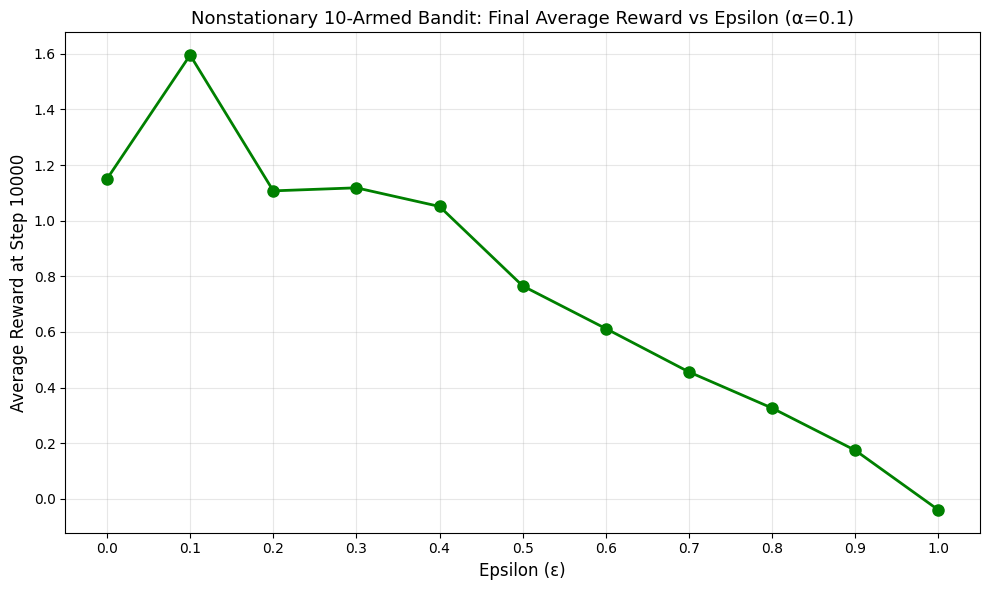

In [4]:

# --- Varying Epsilon Analysis ---
# Test epsilon values from 0 to 1
epsilon_values = np.linspace(0, 1, 11)  # 0.0, 0.1, 0.2, ..., 1.0
avg_rewards_final = []

print("Testing varying epsilon values with alpha=0.1...")
for eps in epsilon_values:
    print(f"  Running with epsilon={eps:.1f}...")
    avg_rew, _ = run_experiment(steps=10000, runs=500, eps=eps, alpha=0.1)
    avg_rewards_final.append(avg_rew[-1])  # Get reward at final step

# Plot: Average Reward at Step 10000 vs Epsilon
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, avg_rewards_final, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Epsilon (ε)', fontsize=12)
plt.ylabel('Average Reward at Step 10000', fontsize=12)
plt.title('Nonstationary 10-Armed Bandit: Final Average Reward vs Epsilon (α=0.1)', fontsize=13)
plt.grid(True, alpha=0.3)
plt.xticks(epsilon_values)
plt.tight_layout()
plt.show()
